In [2]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

Load Machine Learning Models

In [3]:
#Carbon Fiber
CF_E1 = joblib.load("CF_E1")
CF_E2 = joblib.load("CF_E2")
CF_Poissons_ratio_12=joblib.load("CF_Poissons_ratio_12")
CF_Shear_Modulus_12=joblib.load("CF_Shear_Modulus_12")
CF_Shear_Modulus_13=joblib.load("CF_Shear_Modulus_13")
CF_Shear_Modulus_23=joblib.load("CF_Shear_Modulus_23")
CF_Area_Density=joblib.load("CF_Area_Density")

#Glass Fiber
GF_E1 = joblib.load("GF_E1")
GF_E2 = joblib.load("GF_E2")
GF_Poissons_ratio_12=joblib.load("GF_Poissons_ratio_12")
GF_Shear_Modulus_12=joblib.load("GF_Shear_Modulus_12")
GF_Shear_Modulus_13=joblib.load("GF_Shear_Modulus_13")
GF_Shear_Modulus_23=joblib.load("GF_Shear_Modulus_23")
GF_Area_Density=joblib.load("GF_Area_Density")

Input Parameters by User

In [4]:
#Call Data Frame
df=pd.read_excel("Input Parameters3.xlsx")
labelencoder=LabelEncoder()
df['Weave']=labelencoder.fit_transform(df['Weave'])

#Separate Fiber Types, Carbon Fiber
df_cf=df[(df['Type']=="Carbon")]

#Separate Fiber Types, Carbon Fiber
df_gf=df[(df['Type']=="Glass")]

In [5]:
df

,Warp_Count,Weft_Count,Thickness,Warp_Filament_Count,Weft_Filament_Count,Warp_Filament_dia,Weft_Filament_dia,Weave,Type
0,9.170088,9.170088,0.177461,1000,1000,7.0,7.0,0,Carbon
1,3.940421,3.940421,0.380692,6000,6000,7.0,7.0,0,Carbon
2,5.991384,5.991384,0.262278,3000,3000,7.0,7.0,1,Carbon
3,2.370837,2.370837,0.398706,12000,12000,7.0,7.0,1,Carbon
4,13.292725,13.292725,0.033686,102,102,5.0,5.0,0,Glass
5,8.793560,8.793560,0.127357,408,408,9.0,9.0,0,Glass
6,3.864574,3.864574,0.243207,816,816,13.0,13.0,0,Glass
7,3.940974,3.940974,0.205883,816,816,3.8,3.8,0,Glass


In [6]:
list_of_material = df['Type'].tolist()
list_of_material

['Carbon', 'Carbon', 'Carbon', 'Carbon', 'Glass', 'Glass', 'Glass', 'Glass']

Predict Mechanical Properties

In [7]:
#Carbon Fiber
cf=df_cf[["Warp_Count","Weft_Count","Thickness","Warp_Filament_Count","Weft_Filament_Count","Weave"]]
df_cf['E1']=CF_E1.predict(cf)
df_cf['E2']=CF_E2.predict(cf)
df_cf['Poissons_ratio_12']=CF_Poissons_ratio_12.predict(cf)
df_cf['Shear_Modulus_12']=CF_Shear_Modulus_12.predict(cf)
df_cf['Shear_Modulus_13']=CF_Shear_Modulus_13.predict(cf)
df_cf['Shear_Modulus_23']=CF_Shear_Modulus_23.predict(cf)
df_cf['Area_Density']=CF_Area_Density.predict(cf)
df_cf['Cost']=0.0551*df_cf['Area_Density']+43.89

df_cf

C:\Users\HOMe\AppData\Local\Temp\ipykernel_5696\3258493365.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cf['E1']=CF_E1.predict(cf)
C:\Users\HOMe\AppData\Local\Temp\ipykernel_5696\3258493365.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cf['E2']=CF_E2.predict(cf)
C:\Users\HOMe\AppData\Local\Temp\ipykernel_5696\3258493365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,Warp_Count,Weft_Count,Thickness,Warp_Filament_Count,Weft_Filament_Count,Warp_Filament_dia,Weft_Filament_dia,Weave,Type,E1,E2,Poissons_ratio_12,Shear_Modulus_12,Shear_Modulus_13,Shear_Modulus_23,Area_Density,Cost
0,9.170088,9.170088,0.177461,1000,1000,7.0,7.0,0,Carbon,73.324824,56.625861,0.098694,6.033596,6.294205,5.852907,311.502585,61.053792
1,3.940421,3.940421,0.380692,6000,6000,7.0,7.0,0,Carbon,78.558840,71.969280,0.093760,6.866590,6.873303,6.694991,426.860658,67.410022
2,5.991384,5.991384,0.262278,3000,3000,7.0,7.0,1,Carbon,78.912952,73.667512,0.098626,7.027033,7.055299,6.909076,335.211970,62.360180
3,2.370837,2.370837,0.398706,12000,12000,7.0,7.0,1,Carbon,74.962315,73.587082,0.084912,7.015992,6.602303,6.676893,383.057883,64.996489


In [8]:
#Glass Fiber
gf=df_gf[["Warp_Count","Weft_Count" ,'Thickness',"Warp_Filament_Count","Weft_Filament_Count" ,"Warp_Filament_dia","Weft_Filament_dia"]]
df_gf['E1']=GF_E1.predict(gf)
df_gf['E2']=GF_E2.predict(gf)
df_gf['Poissons_ratio_12']=GF_Poissons_ratio_12.predict(gf)
df_gf['Shear_Modulus_12']=GF_Shear_Modulus_12.predict(gf)
df_gf['Shear_Modulus_13']=GF_Shear_Modulus_13.predict(gf)
df_gf['Shear_Modulus_23']=GF_Shear_Modulus_23.predict(gf)
df_gf['Area_Density']=GF_Area_Density.predict(gf)
df_gf['Cost']=0.0289*df_gf['Area_Density']+6.3111

df_gf

C:\Users\HOMe\AppData\Local\Temp\ipykernel_5696\2610125524.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gf['E1']=GF_E1.predict(gf)
C:\Users\HOMe\AppData\Local\Temp\ipykernel_5696\2610125524.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gf['E2']=GF_E2.predict(gf)
C:\Users\HOMe\AppData\Local\Temp\ipykernel_5696\2610125524.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,Warp_Count,Weft_Count,Thickness,Warp_Filament_Count,Weft_Filament_Count,Warp_Filament_dia,Weft_Filament_dia,Weave,Type,E1,E2,Poissons_ratio_12,Shear_Modulus_12,Shear_Modulus_13,Shear_Modulus_23,Area_Density,Cost
4,13.292725,13.292725,0.033686,102,102,5.0,5.0,0,Glass,19.712342,15.565162,0.212536,2.971965,2.942659,2.905524,60.920872,8.071713
5,8.793560,8.793560,0.127357,408,408,9.0,9.0,0,Glass,21.382575,20.344108,0.173932,3.390718,3.293193,3.299518,152.585034,10.720807
6,3.864574,3.864574,0.243207,816,816,13.0,13.0,0,Glass,18.427118,18.052011,0.190111,3.018844,2.974622,2.796443,133.466388,10.168279
7,3.940974,3.940974,0.205883,816,816,3.8,3.8,0,Glass,5.997558,5.909405,0.325590,1.729261,1.718916,1.692705,21.217952,6.924299


In [9]:
#combine both
df_new=pd.concat([df_cf,df_gf])
df_new=df_new.drop(['Warp_Count',"Weft_Count","Warp_Filament_Count","Weft_Filament_Count","Warp_Filament_dia","Weft_Filament_dia","Weave","Type","Area_Density"],axis=1)

column = df_new.pop('Thickness')
df_new.insert(6, 'Thickness', column)
df_new=df_new.round(decimals = 4)


In [10]:
df_new=df_new.sort_index()
df_new['Type'] = list_of_material
df_new

,E1,E2,Poissons_ratio_12,Shear_Modulus_12,Shear_Modulus_13,Shear_Modulus_23,Thickness,Cost,Type
0,73.3248,56.6259,0.0987,6.0336,6.2942,5.8529,0.1775,61.0538,Carbon
1,78.5588,71.9693,0.0938,6.8666,6.8733,6.6950,0.3807,67.4100,Carbon
2,78.9130,73.6675,0.0986,7.0270,7.0553,6.9091,0.2623,62.3602,Carbon
3,74.9623,73.5871,0.0849,7.0160,6.6023,6.6769,0.3987,64.9965,Carbon
4,19.7123,15.5652,0.2125,2.9720,2.9427,2.9055,0.0337,8.0717,Glass
5,21.3826,20.3441,0.1739,3.3907,3.2932,3.2995,0.1274,10.7208,Glass
6,18.4271,18.0520,0.1901,3.0188,2.9746,2.7964,0.2432,10.1683,Glass
7,5.9976,5.9094,0.3256,1.7293,1.7189,1.6927,0.2059,6.9243,Glass


In [11]:
#df_new.to_csv('Properties.csv',header=False, index=False)
#df_new
df_new = pd.read_csv('Properties.csv', names=('E1', 'E2', 'Poissons_ratio_12', 'Shear_Modulus_12','Shear_Modulus_13','Shear_Modulus_23','Thickness','Cost','Type'))
#print(df_chichu)
df_new

,E1,E2,Poissons_ratio_12,Shear_Modulus_12,Shear_Modulus_13,Shear_Modulus_23,Thickness,Cost,Type
0,53.130,53.130,0.078481,4.2727,4.2385,4.2385,0.177461,50.708327,Carbon
1,63.901,63.901,0.079870,5.4534,5.3493,5.3493,0.380692,61.465926,Carbon
2,70.529,70.529,0.082130,6.4616,6.3981,6.3981,0.262278,57.264065,Carbon
3,74.299,74.299,0.085641,6.9756,6.7108,6.7108,0.398706,65.024507,Carbon
4,12.630,12.630,0.226000,2.2300,2.1900,2.1900,0.033686,6.703550,Glass
5,20.200,20.200,0.268000,1.9100,1.9000,1.9000,0.127357,7.153067,Glass
6,17.700,17.700,0.319000,1.7400,1.7300,1.7300,0.243207,7.082872,Glass
7,6.040,6.040,0.331000,1.7300,1.7200,1.7200,0.205883,6.848946,Glass


In [12]:
# #df_chichu.subtract(df_new)
# df_yo = pd.DataFrame()
# df_yo['E1']=(df_neww['E1']-df_new['E1'])*100/df_neww['E1']
# df_yo['E2']=(df_neww['E2']-df_new['E2'])*100/df_neww['E2']
# df_yo['Poissons_ratio_12']=(df_neww['Poissons_ratio_12']-df_new['Poissons_ratio_12'])*100/df_neww['Poissons_ratio_12']
# df_yo['Shear_Modulus_12']=(df_neww['Shear_Modulus_12']-df_new['Shear_Modulus_12'])*100/df_neww['Shear_Modulus_12']
# df_yo['Shear_Modulus_12']=(df_neww['Shear_Modulus_12']-df_new['Shear_Modulus_12'])*100/df_neww['Shear_Modulus_12']
# df_yo['Shear_Modulus_13']=(df_neww['Shear_Modulus_13']-df_new['Shear_Modulus_13'])*100/df_neww['Shear_Modulus_13']
# df_yo['Shear_Modulus_23']=(df_neww['Shear_Modulus_23']-df_new['Shear_Modulus_23'])*100/df_neww['Shear_Modulus_23']
# df_yo['Thickness']=(df_neww['Thickness']-df_new['Thickness'])*100/df_neww['Thickness']
# df_yo['Cost']=(df_neww['Cost']-df_new['Cost'])*100/df_neww['Cost']
# df_yo

# HONEY COMB CORE DATA

In [13]:
HC_Data=pd.read_excel("hc data gpa to mpa 25-7-22.xlsx")
HC_Data

,Name,E1,E2,E3,nu12,nu21,nu13,nu23,nu31,nu32,G12,G13,G23,Wall_Thickness (mm),Sheet_Thickness (mm),Rho_Material (kg/m3),E_Material (MPa),nu_Material,Relative_Density,Absolute_Density (kg/m3)
0,1/16 – 5052 – .0007,0.001100,0.001100,2.069630,0.998583,0.999055,0.000175,0.000175,0.33,0.33,0.000612,0.291772,0.444673,0.01778,5,2680,69300,0.33,0.029865,80.0377
1,1/16 – 5052 – .001,0.003199,0.003202,2.956620,0.997115,0.998075,0.000357,0.000357,0.33,0.33,0.001780,0.416816,0.635247,0.02540,5,2680,69300,0.33,0.042664,114.3400
2,1/16 – 5052 – .0015,0.010740,0.010763,4.434930,0.993542,0.995685,0.000799,0.000801,0.33,0.33,0.005981,0.625225,0.952871,0.03810,5,2680,69300,0.33,0.063996,171.5090
3,1/8 – 5052 – .0007,0.000138,0.000138,1.034870,0.999645,0.999763,0.000044,0.000044,0.33,0.33,0.000077,0.145894,0.225856,0.01778,5,2680,69300,0.33,0.014933,40.0211
4,1/8 – 5052 – .001,0.000401,0.000401,1.478390,0.999276,0.999517,0.000090,0.000090,0.33,0.33,0.000223,0.208420,0.322652,0.02540,5,2680,69300,0.33,0.021333,57.1729
5,1/8 – 5052 – .0015,0.001352,0.001353,2.217580,0.998374,0.998915,0.000201,0.000201,0.33,0.33,0.000752,0.312629,0.483978,0.03810,5,2680,69300,0.33,0.032000,85.7594
6,1/8 – 5052 – .002,0.003200,0.003203,2.956780,0.997114,0.998074,0.000357,0.000357,0.33,0.33,0.001780,0.416839,0.645304,0.05080,5,2680,69300,0.33,0.042666,114.3460
7,1/8 – 5052 – .0025,0.006234,0.006244,3.695970,0.995502,0.996997,0.000557,0.000557,0.33,0.33,0.003470,0.521049,0.806630,0.06350,5,2680,69300,0.33,0.053333,142.9320
8,1/8 – 5052 – .003,0.010742,0.010765,4.435170,0.993541,0.995685,0.000799,0.000801,0.33,0.33,0.005982,0.625259,0.967956,0.07620,5,2680,69300,0.33,0.064000,171.5190
9,5/32 – 5052 – .0007,0.000071,0.000071,0.827889,0.999773,0.999849,0.000028,0.000028,0.33,0.33,0.000039,0.116714,0.182086,0.01778,5,2680,69300,0.33,0.011947,32.0165


In [14]:
core_list = HC_Data["Name"].tolist()

In [15]:
HC_Data["Absolute_Density (kg/m3)"]

0      80.0377
1     114.3400
2     171.5090
3      40.0211
4      57.1729
5      85.7594
6     114.3460
7     142.9320
8     171.5190
9      32.0165
10     45.7378
11     68.6068
12     91.4757
13    114.3450
14     26.6802
15     38.1146
16     57.1719
17     76.2292
18     95.2865
19    114.3440
20     20.0100
21     28.5857
22     42.8785
23     57.1714
24     71.4642
25     85.7571
26    114.3430
27     13.3401
28     19.0573
29     28.5859
30     38.1146
31     47.6432
32     57.1719
33     76.2292
34     95.2865
35    112.6330
36     39.4237
37     56.3196
38     84.4794
39    112.6390
40     31.5386
41     45.0552
42     67.5828
43     90.1104
44     26.2820
45     44.3405
46     59.1207
47     73.9008
48     22.1725
49     33.2587
50     44.3449
51     55.4312
52     66.5174
Name: Absolute_Density (kg/m3), dtype: float64

Core  Selection  Gui

In [16]:
# Import module
from tkinter import *
import tkinter as tk

# Create object
root = Tk()
def Close():
    global result
    result=textExample.get("1.0","end-1c")
    print(result)
    root.destroy()
root.geometry( "600x600" )

def show():
    label.config( text = clicked.get() )
  

#"Monday Haris",#]
options =core_list

# datatype of menu text
clicked = StringVar()
  
# initial menu text
clicked.set( "Select-Core" )
  
# Create Dropdown menu
drop = OptionMenu( root , clicked , *options )
drop.pack()
#----------------------------------

def getTextInput():
    global result
    result=textExample.get("1.0")
    print(result)
    
l = Label(text = "Core Thickness (mm) ")
inputtxt = Text(root, height = 10,
                width = 35,
                bg = "light yellow")

textExample=tk.Text(root, height=3,width=10)
textExample.pack()
#btnRead=tk.Button(root, height=1, width=20, text="Update Thickness", 
#                    command=getTextInput)

#btnRead.pack()
l.pack()
#---------------------------------------------
# Create Label
label = Label( root , text = " " )
label.pack()
exit_button = Button(root, text="Proceed", command=Close,bg='brown', fg='white')
exit_button.pack(pady=20)  
# Execute tkinter
root.mainloop()

6


something like data calling

In [17]:
clicked.get()

'1/8 – 5052 – .0025'

In [18]:
core_thickness=float(result)

In [19]:
HC_Data_indexed = HC_Data.set_index('Name')
#HC_Data_indexed.head()

In [20]:
HC_Data_filtered=HC_Data_indexed[["E1","E2","nu12","G12","G13","G23","Absolute_Density (kg/m3)"]]
#HC_Data_filtered
core_property = HC_Data_filtered.loc[clicked.get()]
print(core_property)
print(type(core_property))

core_property=core_property.tolist()
Core_density=core_property[-1]
print("Core thickness = "+str(core_thickness))
print("Core Density = "+str(Core_density)+"\n")
del core_property[-1]

material_cost = 48.86
Core_Cost_Per_m2 = Core_density*core_thickness*0.001*material_cost     #0.001 to convert mm to m

core_property.append(core_thickness)
core_property.append(Core_Cost_Per_m2)
print(core_property)

E1                            0.006234
E2                            0.006244
nu12                          0.995502
G12                           0.003470
G13                           0.521049
G23                           0.806630
Absolute_Density (kg/m3)    142.932000
Name: 1/8 – 5052 – .0025, dtype: float64
<class 'pandas.core.series.Series'>
Core thickness = 6.0
Core Density = 142.932

[0.0062344900000000005, 0.0062438500000000004, 0.995502, 0.00347004, 0.521049, 0.80663, 6.0, 41.90194511999999]


In [21]:
# k = core_property
# k.append("CORE")
# k
# core_data = pd.DataFrame(columns=['E1', 'E2', 'nu12','g12','g13','g23','Core_thickness','Core_Cost','Type'], data=[k])
# core_data = core_data.round(decimals = 4)
# core_data

Optimization

In [22]:
from scipy.optimize import differential_evolution#
from numpy.random import rand
from numpy import exp, sqrt, cos, e, pi, meshgrid, arange
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import pandas as pd
from composites import laminated_plate

from itertools import combinations_with_replacement
import itertools

In [1]:
#input Requirments
from csv import reader
# open file in read mode
with open('Properties.csv', 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    # Get all rows of csv from csv_reader object as list of tuples
    Lamina_Properties = list(map(tuple,csv_reader))
    print(Lamina_Properties)
res = []
for tup in Lamina_Properties:
    # list comprehension to check for each case
    temp = [ele if ele.isalpha() else float(ele) for ele in tup]
    res.append((temp[0],temp[1],temp[2],temp[3],temp[4],temp[5],temp[6],temp[7]))

dictOfFabrics = { i : res[i] for i in range(0, len(res) ) }
dictOfFabrics = dict(map(reversed, dictOfFabrics.items()))
dictOfFabrics[tuple(core_property)] = -1
print(dictOfFabrics)

fabric=[i[0:6] for i in dictOfFabrics]
fabric

[('ï»¿54.44', '54.44', '0.078428', '4.3884', '4.3391', '4.3391', '0.47363', '0.160110501', '50.18483141', 'Carbon'), ('53.942', '53.942', '0.079364', '4.306', '4.1895', '4.1895', '0.47739', '0.23518179', '52.98673937', 'Carbon'), ('63.297', '63.297', '0.078776', '5.4334', '5.4289', '5.4289', '0.49371', '0.400221002', '62.32503503', 'Carbon'), ('68.728', '68.728', '0.082542', '6.0631', '5.8324', '5.8324', '0.49484', '0.393601366', '63.26757003', 'Carbon'), ('58.142', '58.142', '0.078297', '4.7941', '4.7592', '4.7592', '0.47967', '0.173407001', '51.20697165', 'Carbon'), ('67.879', '67.879', '0.080837', '6.066', '6.0229', '6.0229', '0.48873', '0.28874246', '58.11072153', 'Carbon'), ('63.533', '63.533', '0.079482', '5.4283', '5.3592', '5.3592', '0.49556', '0.400221002', '62.31268623', 'Carbon'), ('67.511', '67.511', '0.081726', '5.9067', '5.7185', '5.7185', '0.4962', '0.467174787', '66.54495145', 'Carbon')]


ValueError: could not convert string to float: 'ï»¿54.44'

# CASE-I

In [24]:
# Differential evolution is inside a fuction called DE, 
#its input variable is No. of laminas, this function is called in a while loop in next cell

# input_list=[(1,9),(2,8),(3,7),(4,6),(5,5)]
# def findMiddle(input_list):
#     middle = float(len(input_list))/2
#     if middle % 2 != 0:
#         return int(middle - .5)
#     else:
#         return ("69")


def DE(name):#
    
    
    def objective(v):#
        #saving floats to list
        a_list_floats = v

        #converting float to list of intgers
        a_list_int = (list(map(int,a_list_floats)))

        #splitting list in half to (Fabric_No & stacking angles)
        middle_index = len(a_list_int)//2
        Fabric_No = a_list_int[:middle_index]
        ########################-CORE Injection & symmetry Protocol-#############################
        
        reverse_Fabric_No = Fabric_No[:-1][::-1]
        Fabric_No[-1:] = [-1]
        Fabric_No.extend(reverse_Fabric_No)
        
        ##########################################################
        stacking_angles = a_list_int[middle_index:]
        reverse_stacking_angles = stacking_angles[:-1][::-1]
        stacking_angles.extend(reverse_stacking_angles)

        #dictionary to replace intgers with fabric properties
        reversed_Fab_dict = {dictOfFabrics[k]:k for k in dictOfFabrics}

        #applying fabric properties dictionary
        Fabric_No = [reversed_Fab_dict[elem] for elem in Fabric_No]
        #print(Fabric_No)

        #making dictionary to replace intgers with stacking angles
        my_dict = {0: 0, 1: 45, 2: -45, 3: 90}
        #reversed_dict = {my_dict[k]:k for k in my_dict}

        #applying stacking angle dictionary
        stacking_angles = [my_dict[elem] for elem in stacking_angles]
        #print(stacking_angles)
        #=====================================================================
        # splitting Fab properties into elastic prop, Thickness, price--------


        Fabric_elastic_prop = [i[0:6] for i in Fabric_No]
        #Fabric_elastic_prop = Fabric_elastic_prop[findMiddle(Fabric_elastic_prop)] = core_property
        
        Fabric_thickness = [i[6] for i in Fabric_No]
        #Fabric_thickness = Fabric_thickness[findMiddle(Fabric_thickness)] = core_thickness
        
        Fabric_price = [i[7] for i in Fabric_No]
        #Fabric_price= Fabric_price[findMiddle(Fabric_price)] = 0


        #=====================================================================
        # total cost calc

        total_price = sum(Fabric_price)
        #print("Total cost = "+str(total_price))

        #print(Fabric_elastic_prop)
        #print(Fabric_thickness)
        #print(Fabric_price)

        #====================================================================
        #  CLT  ------------------------------------------------------------

        laminapropss = Fabric_elastic_prop

        Thicknesses = Fabric_thickness

        stack = stacking_angles

        plate = laminated_plate(stack, laminaprops = laminapropss, plyts = Thicknesses)
        
        Actual_thickness = sum(Fabric_thickness)

        plate.calc_equivalent_properties()

        #laminate_height = plate.h
        #============================================================================

        #Max_cost= 100
        if (Actual_thickness > laminate_thickness ):
            y=999999999
        else:
            y = Actual_thickness
        
        #Max_cost= 100
        if (total_price > Max_cost ):
            x=100000
        else:
            x = -plate.D11
        
        if (x==100000 or y==999999999 ):
            xy=999999999
        else:
            xy = -plate.D11
        #print("Target Value = "+str(-x))
        #print("=================")
        return  xy#


    #==========================================================

    laminas=int(name)

    bounds = [(0,len(Lamina_Properties))]*laminas+[(0,4)]*laminas#
    # perform the differential evolution search
    result = differential_evolution(objective, bounds, workers=1)#

    # summarize the result
    print('Status : %s' % result['message'])
    print('Total Evaluations: %d' % result['nfev'])
    # evaluate solution
    solution = result['x'].astype(int)
    evaluation = objective(solution)
    print('\nSolution: f(%s) = %.5f' % (solution, evaluation))
    u=evaluation
    
    
    print("No of laminas are, " + str(int(name)+(int(name)-1)))
    
    #all the below code is to print cost and target value
    
    middle_index = len(solution)//2
    Fabric_No = solution[:middle_index]
    Fabric1 = Fabric_No
    Fabric1.tolist()
    Fabric1[-1:] = [-1]
    #saving fabric sequence in array for later use
    Fabric_sequence_array.append(Fabric1)
    
    Fabric_No=Fabric_No.tolist()
   
    #print((Fabric_No))
    
    
    reverse_Fabric_No = Fabric_No[:-1][::-1]
    Fabric_No[-1:] = [-1]
    Fabric_No.extend(reverse_Fabric_No)
    
    #print("middle layer replaced with core below")
    print((Fabric_No))
    stacking_angles = solution[middle_index:]
    
    stacking_angle_temp = stacking_angles
    
    
    reverse_stacking_angles = stacking_angles[:-1][::-1]
    stacking_angles = np.append(stacking_angles, reverse_stacking_angles)

    #dictionary to replace intgers with fabric properties
    reversed_Fab_dict = {dictOfFabrics[k]:k for k in dictOfFabrics}

    #applying fabric properties dictionary
    Fabric_No = [reversed_Fab_dict[elem] for elem in Fabric_No]
    #print(Fabric_No)

    #making dictionary to replace intgers with stacking angles
    my_dict = {0: 0, 1: 45, 2: -45, 3: 90}
    #reversed_dict = {my_dict[k]:k for k in my_dict}

    #applying stacking angle dictionary
    stacking_angles = [my_dict[elem] for elem in stacking_angles]
    stacking_angle_converted = [my_dict[elem] for elem in stacking_angle_temp]
    stacking_angle_array.append(stacking_angle_converted)
    print(stacking_angles)
    #====================================================
    #print(Fabric_No)
    Fabric_elastic_prop = [i[0:6] for i in Fabric_No]
    #Fabric_elastic_prop = Fabric_elastic_prop[findMiddle(Fabric_elastic_prop)] = core_property
    
    Fabric_thickness = [i[6] for i in Fabric_No]
    #Fabric_thickness = Fabric_thickness[findMiddle(Fabric_thickness)] = core_thickness
    
    Fabric_price = [i[7] for i in Fabric_No]
    #Fabric_price= Fabric_price[findMiddle(Fabric_price)] = 0


    #=====================================================================
    # total cost calc

    total_price = sum(Fabric_price)
    print("Total cost = "+str(total_price))
    Total_Cost_array.append(total_price) 
    D11_array.append(evaluation) 
    #print(Fabric_elastic_prop)
    #print(Fabric_thickness)
    #print(Fabric_price)
    print("Laminate_thickness = "+str(sum(Fabric_thickness)))
    print("Target Value = "+str(evaluation))
    #print(str(evaluation))
    print("=================")
    return  str(evaluation)

In [24]:
#Constraint
Max_cost= 350   # Dollar/sq meter
laminate_thickness =5

Solution NO = 1
Status : Optimization terminated successfully.
Total Evaluations: 905

Solution: f([3 5 3 2]) = -86.95488
No of laminas are, 3
[3, -1, 3]
[90, -45, 90]
Total cost = 137.870297924
Laminate_thickness = 2.797412554
Target Value = -86.95488425988471


Solution NO = 2
Status : Optimization terminated successfully.
Total Evaluations: 2527

Solution: f([3 3 7 3 0 1]) = -240.16798
No of laminas are, 5
[3, 3, -1, 3, 3]
[90, 0, 45, 0, 90]
Total cost = 267.91931180399996
Laminate_thickness = 3.594825108
Target Value = -240.16797806780298


Solution NO = 3
Status : Optimization terminated successfully.
Total Evaluations: 6729

Solution: f([3 3 6 2 0 3 0 2]) = -340.54684
No of laminas are, 7
[3, 3, 6, -1, 6, 3, 3]
[0, 90, 0, -45, 0, 90, 0]
Total cost = 282.085055024
Laminate_thickness = 4.0812399599999996
Target Value = -340.5468373952558


Solution NO = 4
Status : Optimization terminated successfully.
Total Evaluations: 5111

Solution: f([3 3 6 6 4 3 0 0 0 2]) = -460.84320
No of la

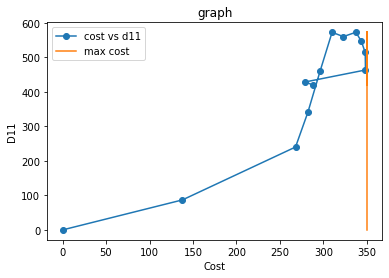

C:\Users\HP\AppData\Local\Temp/ipykernel_9316/3985851634.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  material_properties['Fabrics No'] = material_properties.index


In [25]:
global Total_Cost_array
global D11_array
global Fabric_sequence_array
global stacking_angle_array
Total_Cost_array = [0]
D11_array = [0]
Fabric_sequence_array = [0]
stacking_angle_array = [0]
#for loop for evenly increasing lamina, runs untill a positive value is retured from DE final output
# so final result is the second last result
result_no=1
i = 2
k=-5
while k < 100:
    print("Solution NO = "+ str(result_no))
    string = (str(DE(str(i))))
    print("\n")
    if float(string) > 99.0: # basically loop stop when positive value is retured
        Total_Cost_array_n = Total_Cost_array[:-1]
        D11_array_n = D11_array[:-1]
        D11_array_n = [i * -1 for i in D11_array_n]
        print("NO FURTHER OPTIMIZATION POSSIBLE CONSIDER "+ str(D11_array_n.index(max(D11_array_n))) +"th SOLUTION \n \n")
        print(df_new[["E1","E2","Thickness","Cost","Type"]])
        

        import numpy as np
        import matplotlib.pyplot as plt

        plt.title("graph")
        plt.xlabel("Cost")
        plt.ylabel("D11")
        plt.plot(Total_Cost_array_n, D11_array_n,"-o", label = "cost vs d11")
        plt.plot([Max_cost]*(len(D11_array_n)), D11_array_n, label = "max cost")
        plt.legend()
        plt.show()
        
        
        material_properties = df_new[["E1","E2","Thickness","Cost","Type"]]
        material_properties['Fabrics No'] = material_properties.index
        material_properties
        first_column = material_properties.pop('Fabrics No')
        material_properties.insert(0, 'Fabrics No', first_column)
        #material_properties

        core_c = core_property[:]
        del core_c[2:6]
        core_c.insert(0, -1)
        core_c.insert(5, "Core")
        to_append = core_c
        a_series = pd.Series(to_append, index = material_properties.columns)
        materials = material_properties.append(a_series, ignore_index=True)
        #print("Material Reference Table")
        materials
        
        
        
        FN = pd.DataFrame(Fabric_sequence_array[D11_array_n.index(max(D11_array_n))], columns =['Fabric.NO'])
        reversed_Fab_dict = {dictOfFabrics[k]:k for k in dictOfFabrics}

        FF = Fabric_sequence_array[D11_array_n.index(max(D11_array_n))]
        FF = [reversed_Fab_dict[elem] for elem in FF]

        Fabric_thickness = [i[6] for i in FF]
        Fabric_thickness
        FT = pd.DataFrame(Fabric_thickness, columns =['Thickness'])
        fabricNo_to_material = dict (zip(materials['Fabrics No'], materials['Type']))
        Laminate_Layup = pd.concat([FN, FT], axis=1)
        Laminate_Layup["Material"] = Laminate_Layup["Fabric.NO"]
        #Laminate_Layup

        Laminate_Layup=Laminate_Layup.replace({"Material": fabricNo_to_material})
        first_column = Laminate_Layup.pop('Material')
        Laminate_Layup.insert(0, 'Material', first_column)
        Laminate_Layup["Stacking Angle"] = (stacking_angle_array[D11_array_n.index(max(D11_array_n))])
        Laminate_Layup
        
        
        
        def color(val):
            if val == "Carbon":
                color = 'grey'
            elif val == "Glass":
                color = 'lightblue'
            elif val == "Core":
                color = 'yellow'
            return 'background-color: %s' % color
        
        
        
        break
    i += 1
    result_no += 1
 

NameError: name 'ind' is not defined

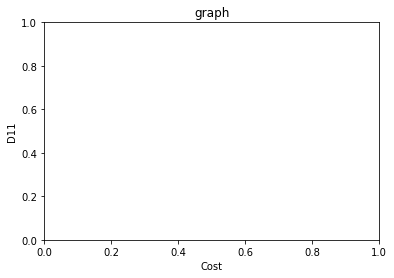

In [26]:
plt.title("graph")
plt.xlabel("Cost")
plt.ylabel("D11")
plt.plot(Total_Cost_array_n[0:int(ind)+1], D11_array_n[0:int(ind)+1],"-o", label = "cost vs D11")
plt.plot(Total_Cost_array_n[0:int(ind)+1],[minD11]*(int(ind)+1), label = "Min D11")
plt.legend()
plt.show()

In [27]:
# import numpy as np
# import matplotlib.pyplot as plt

# for i in range(len(Total_Cost_array_n)):
#     if Total_Cost_array_n[i] == 999999999:
#         Total_Cost_array_n[i] = 0



# plt.title("graph")
# plt.xlabel("Cost")
# plt.ylabel("A11")
# plt.plot(Total_Cost_array_n, A11_array_n,"-o", label = "cost vs A11")
# plt.plot(Total_Cost_array_n,[minA11]*(len(Total_Cost_array_n)), label = "Min A11")
# plt.legend()
# plt.show()


# material_properties = df_new[["E1","E2","Thickness","Cost","Type"]]
# material_properties['Fabrics No'] = material_properties.index
# material_properties
# first_column = material_properties.pop('Fabrics No')
# material_properties.insert(0, 'Fabrics No', first_column)
# #material_properties

# core_c = core_property[:]
# del core_c[2:6]
# core_c.insert(0, -1)
# core_c.insert(5, "Core")
# to_append = core_c
# a_series = pd.Series(to_append, index = material_properties.columns)
# materials = material_properties.append(a_series, ignore_index=True)
# #print("Material Reference Table")
# materials



# FN = pd.DataFrame(Fabric_sequence_array[int(ind)], columns =['Fabric.NO'])
# reversed_Fab_dict = {dictOfFabrics[k]:k for k in dictOfFabrics}

# FF = Fabric_sequence_array[(int(ind))]
# FF = [reversed_Fab_dict[elem] for elem in FF]

# Fabric_thickness = [i[6] for i in FF]
# Fabric_thickness
# FT = pd.DataFrame(Fabric_thickness, columns =['Thickness'])
# fabricNo_to_material = dict (zip(materials['Fabrics No'], materials['Type']))
# Laminate_Layup = pd.concat([FN, FT], axis=1)
# Laminate_Layup["Material"] = Laminate_Layup["Fabric.NO"]
# #Laminate_Layup

# Laminate_Layup=Laminate_Layup.replace({"Material": fabricNo_to_material})
# first_column = Laminate_Layup.pop('Material')
# Laminate_Layup.insert(0, 'Material', first_column)
# Laminate_Layup["Stacking Angle"] = (stacking_angle_array[int(ind)])
# Laminate_Layup



# def color(val):
#     if val == "Carbon":
#         color = 'grey'
#     elif val == "Glass":
#         color = 'lightblue'
#     elif val == "Core":
#         color = 'yellow'
#     return 'background-color: %s' % color

In [28]:
print("Material Reference Table")
materials

Material Reference Table


,Fabrics No,E1,E2,Thickness,Cost,Type
0,0,53.1300,53.1300,0.177461,50.708327,Carbon
1,1,63.9010,63.9010,0.380692,61.465926,Carbon
2,2,70.5290,70.5290,0.262278,57.264065,Carbon
3,3,74.2990,74.2990,0.398706,65.024507,Carbon
4,4,12.6300,12.6300,0.033686,6.703550,Glass
5,5,20.2000,20.2000,0.127357,7.153067,Glass
6,6,17.7000,17.7000,0.243207,7.082872,Glass
7,7,6.0400,6.0400,0.205883,6.848946,Glass
8,-1,0.0011,0.0011,2.000000,7.821284,Core


In [29]:
print("Laminate Top Half Layup")
Laminate_Layup.style.applymap(color, subset=['Material']).set_properties(
    subset=['Material'], **{'width': '200px'}).set_properties(
    **{'border': '1px black solid !important'})

Laminate Top Half Layup


,Material,Fabric.NO,Thickness,Stacking Angle
0,Carbon,3,0.398706,90
1,Carbon,3,0.398706,0
2,Glass,5,0.127357,0
3,Glass,6,0.243207,0
4,Glass,6,0.243207,90
5,Glass,4,0.033686,90
6,Glass,4,0.033686,0
7,Core,-1,2.000000,45


In [30]:
Laminate_Layup

,Material,Fabric.NO,Thickness,Stacking Angle
0,Carbon,3,0.398706,90
1,Carbon,3,0.398706,0
2,Glass,5,0.127357,0
3,Glass,6,0.243207,0
4,Glass,6,0.243207,90
5,Glass,4,0.033686,90
6,Glass,4,0.033686,0
7,Core,-1,2.000000,45


In [31]:
#XXXXXXXXXXXXXXXXXXXXXX---------END--------XXXXXXXXXXXXXXXXX

In [32]:
s="6 2 3 3 7 3 0 0 0 1"   #  <--------------------------- PAST solution HERE
s=(s.split(" "))
solution = []
for element in s:
    solution.append(int(element))
solution

[6, 2, 3, 3, 7, 3, 0, 0, 0, 1]

In [33]:
a_list_floats = solution

#converting float to list of intgers
a_list_int = (list(map(int,a_list_floats)))

#splitting list in half to (Fabric_No & stacking angles)
middle_index = len(a_list_int)//2
Fabric_No = a_list_int[:middle_index]
########################-CORE Injection & symmetry Protocol-#############################

reverse_Fabric_No = Fabric_No[:-1][::-1]
Fabric_No[-1:] = [-1]
Fabric_No.extend(reverse_Fabric_No)

##########################################################
stacking_angles = a_list_int[middle_index:]
reverse_stacking_angles = stacking_angles[:-1][::-1]
stacking_angles.extend(reverse_stacking_angles)

#dictionary to replace intgers with fabric properties
reversed_Fab_dict = {dictOfFabrics[k]:k for k in dictOfFabrics}

#applying fabric properties dictionary
Fabric_No = [reversed_Fab_dict[elem] for elem in Fabric_No]
#print(Fabric_No)

#making dictionary to replace intgers with stacking angles
my_dict = {0: 0, 1: 45, 2: -45, 3: 90}
#reversed_dict = {my_dict[k]:k for k in my_dict}

#applying stacking angle dictionary
stacking_angles = [my_dict[elem] for elem in stacking_angles]
#print(stacking_angles)
#=====================================================================
# splitting Fab properties into elastic prop, Thickness, price--------


Fabric_elastic_prop = [i[0:6] for i in Fabric_No]
#Fabric_elastic_prop = Fabric_elastic_prop[findMiddle(Fabric_elastic_prop)] = core_property

Fabric_thickness = [i[6] for i in Fabric_No]
#Fabric_thickness = Fabric_thickness[findMiddle(Fabric_thickness)] = core_thickness

Fabric_price = [i[7] for i in Fabric_No]
#Fabric_price= Fabric_price[findMiddle(Fabric_price)] = 0


#=====================================================================
# total cost calc

total_price = sum(Fabric_price)
#print("Total cost = "+str(total_price))

#print(Fabric_elastic_prop)
#print(Fabric_thickness)
#print(Fabric_price)

#====================================================================
#  CLT  ------------------------------------------------------------

laminapropss = Fabric_elastic_prop

Thicknesses = Fabric_thickness

stack = stacking_angles

plate = laminated_plate(stack, laminaprops = laminapropss, plyts = Thicknesses)


plate.calc_equivalent_properties()

# plate.A11
# plate.A22

In [34]:
print(plate.A11)
print(plate.A22)
print(plate.e1)
print(plate.e2)
print(plate.g12)
print(plate.nu12)
print(plate.nu21)
print(plate.D11)

167.1346084594649
167.1346084594649
35.90044947110994
35.90044947110994
3.335198537850178
0.10332904368097358
0.10332904368097358
424.5696865383987


In [35]:
sum(Thicknesses)

4.60579555